In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset

data = pd.read_csv('/content/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.shape

(18461, 12)

In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.0,18460.000000
mean,11.831738,10.794448,0.724785,10.552023,191.896154,10.143651,0.0,997.535822
std,9.431906,10.487281,0.192096,6.785348,105.609461,3.749637,0.0,141.512475
min,-14.088889,-22.094444,0.130000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.866667,2.450000,0.600000,5.377400,121.000000,9.676100,0.0,1011.920000
50%,11.644444,11.644444,0.770000,9.627800,190.500000,9.982000,0.0,1016.765000
75%,18.662500,18.662500,0.880000,14.011025,289.000000,11.398800,0.0,1022.220000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,0.0,1045.140000


In [ ]:
A = np.arrange(10,19).reshape((3,3))
print[A(0,:)]
print[A(:,0)]

SyntaxError: ignored

In [ ]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
data.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [ ]:
data = data.set_index('Formatted Date')
data.head()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#resampling of data

data_cols = ['Apparent Temperature (C)', 'Humidity']
data_month = data[data_cols].resample('MS').mean()
data_month.head(7)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125


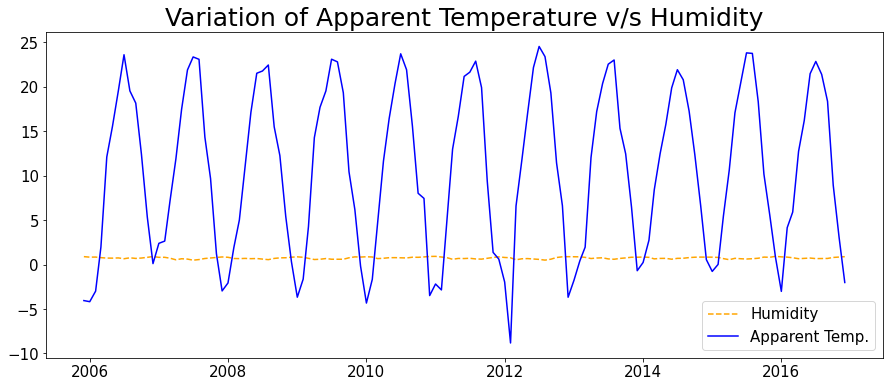

In [ ]:
#Plotting the variation in Apparent Temperature and Humidity with time


plt.figure(figsize=(15,6))
plt.plot(data_month['Humidity'],label='Humidity',color='orange',linestyle='dashed');
plt.plot(data_month['Apparent Temperature (C)'],label='Apparent Temp.',color='blue');
plt.title('Variation of Apparent Temperature v/s Humidity',fontsize=25);
plt.legend(loc=0,fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);



Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

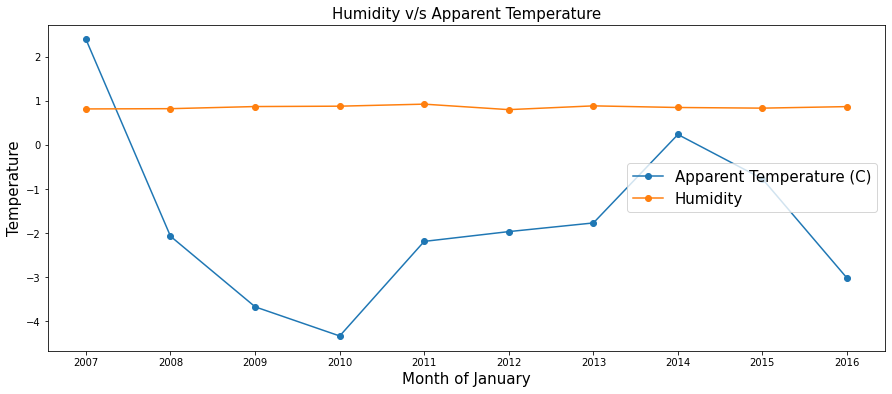

In [ ]:
Jan = data_month[data_month.index.month==1]
plt.figure(figsize=(15,6))
plt.plot(Jan.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Jan.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of January',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

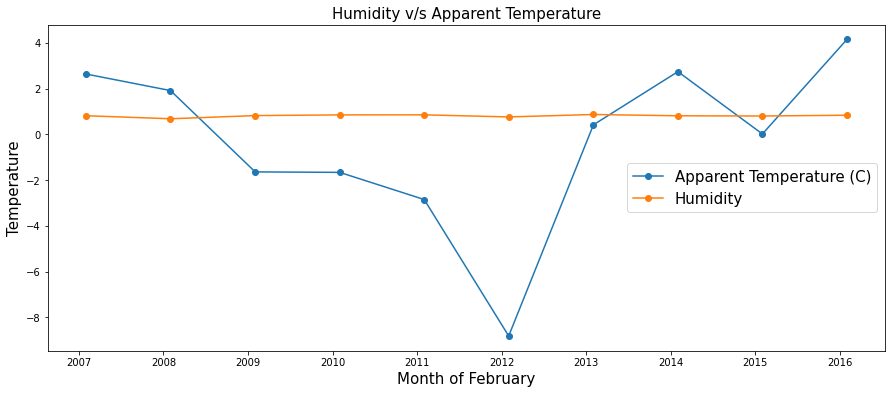

In [ ]:
Feb = data_month[data_month.index.month==2]
plt.figure(figsize=(15,6))
plt.plot(Feb.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Feb.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of February',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

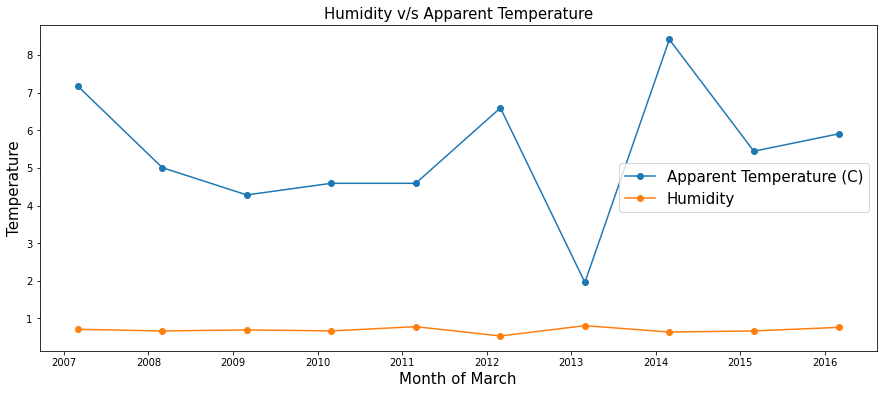

In [ ]:
Mar = data_month[data_month.index.month==3]
plt.figure(figsize=(15,6))
plt.plot(Mar.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Mar.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of March',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

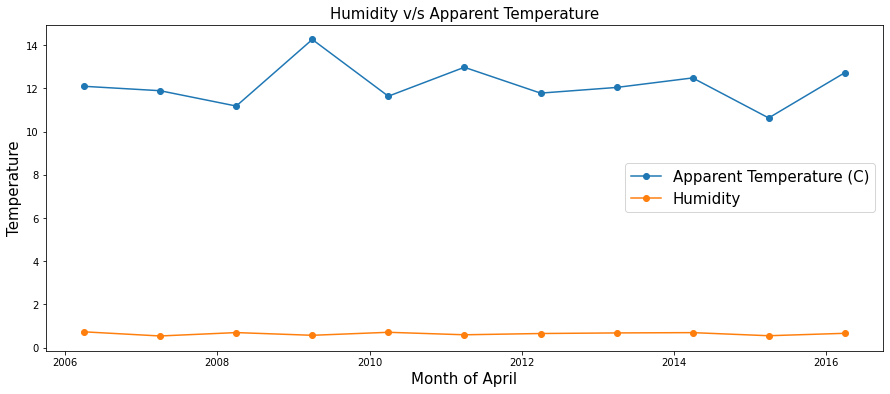

In [ ]:
Apr = data_month[data_month.index.month==4]
plt.figure(figsize=(15,6))
plt.plot(Apr.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Apr.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of April',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

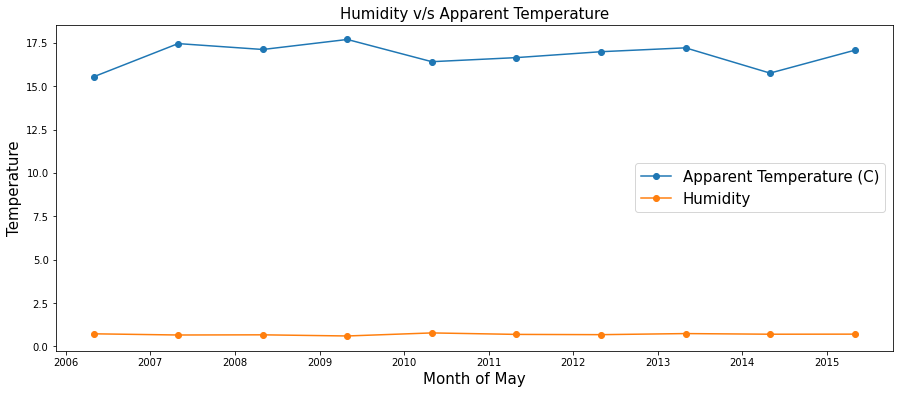

In [ ]:
May = data_month[data_month.index.month==5]
plt.figure(figsize=(15,6))
plt.plot(May.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(May.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of May',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

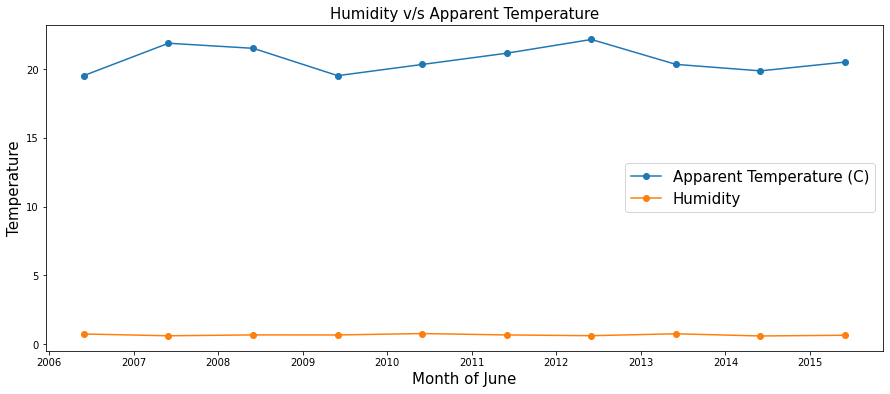

In [ ]:
June = data_month[data_month.index.month==6]
plt.figure(figsize=(15,6))
plt.plot(June.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(June.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of June',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

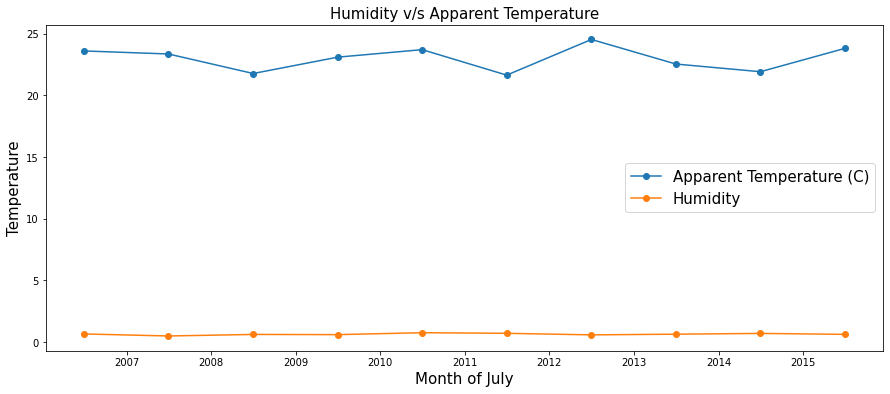

In [ ]:
July = data_month[data_month.index.month==7]
plt.figure(figsize=(15,6))
plt.plot(July.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(July.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of July',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

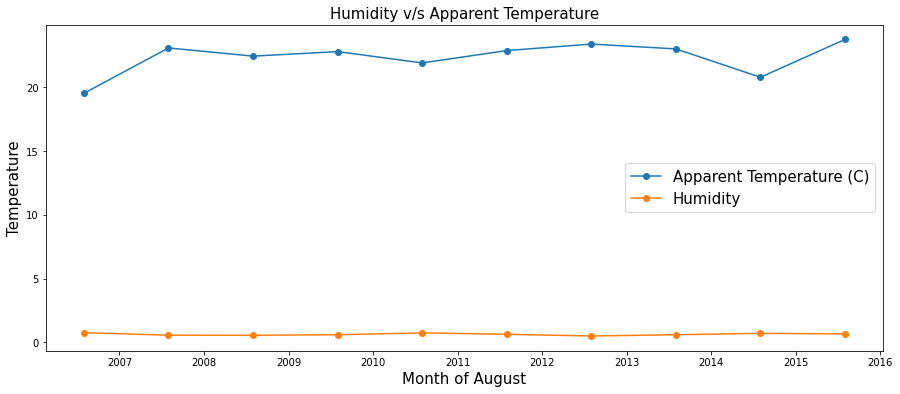

In [ ]:
Aug = data_month[data_month.index.month==8]
plt.figure(figsize=(15,6))
plt.plot(Aug.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Aug.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of August',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

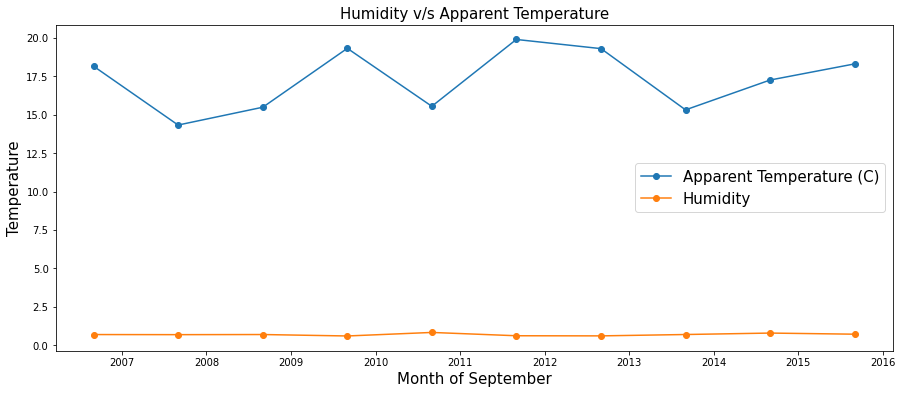

In [ ]:
Sep = data_month[data_month.index.month==9]
plt.figure(figsize=(15,6))
plt.plot(Sep.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Sep.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of September',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

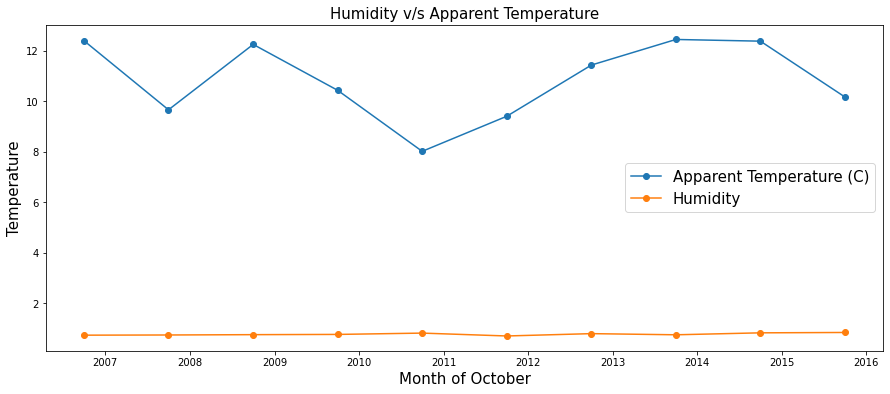

In [ ]:
Oct = data_month[data_month.index.month==10]
plt.figure(figsize=(15,6))
plt.plot(Oct.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Oct.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of October',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

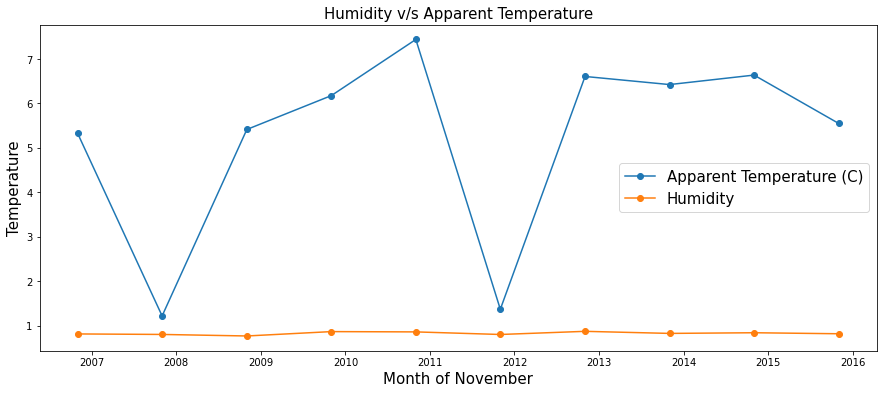

In [ ]:
Nov = data_month[data_month.index.month==11]
plt.figure(figsize=(15,6))
plt.plot(Nov.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Nov.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of November',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

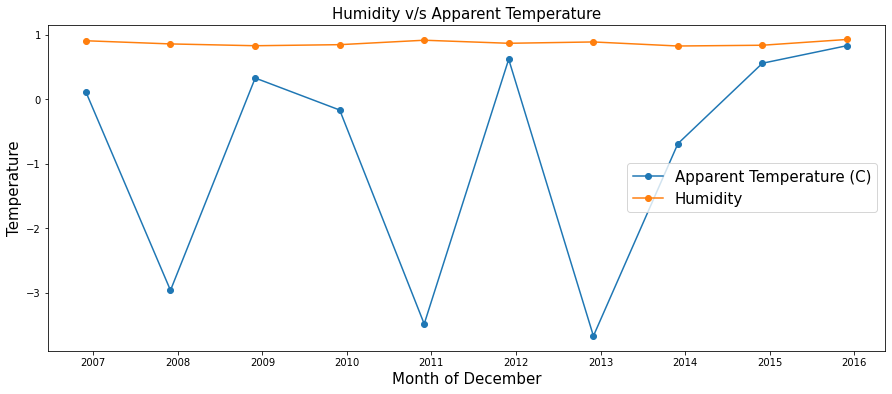

In [ ]:
Dec = data_month[data_month.index.month==12]
plt.figure(figsize=(15,6))
plt.plot(Dec.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
plt.plot(Dec.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
plt.legend(loc = 'center right',fontsize=15);
plt.xlabel('Month of December',fontsize=15);
plt.ylabel('Temperature',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)